# **AN INTRUSION DETECTION SYSTEM FOR THE INTERNET OF MEDICAL THINGS (IOMT): AN ARTIFICIAL INTELLIGENCE (AI) APPROACH**



**Data Acquisition and Preliminary Analysis**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

#load the dataset
sample_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/filtered_data.csv")

# Overview details
num_rows, num_cols = sample_data.shape
column_data_types = sample_data.dtypes
missing_values = sample_data.isnull().sum()

num_rows, num_cols, column_data_types, missing_values

<ipython-input-6-a37f7ed046d7>:5: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/filtered_data.csv")


(44694,
 88,
 Unnamed: 0           int64
 Flow ID             object
  Source IP          object
  Source Port         int64
  Destination IP     object
                     ...   
  Idle Max          float64
  Idle Min          float64
 SimillarHTTP        object
  Inbound             int64
  Label              object
 Length: 88, dtype: object,
 Unnamed: 0         0
 Flow ID            0
  Source IP         0
  Source Port       0
  Destination IP    0
                   ..
  Idle Max          0
  Idle Min          0
 SimillarHTTP       0
  Inbound           0
  Label             0
 Length: 88, dtype: int64)

**Data Cleaning**


In [ ]:
# Display columns with missing values (if any)
missing_values[missing_values > 0]

Flow Bytes/s    7
dtype: int64

In [ ]:
# Drop rows with missing values
data_cleaned = sample_data.dropna()

# Check the shape of the dataset after dropping rows with missing values
data_cleaned.shape

(44687, 88)

In [ ]:
# Check the column names to identify any irregularities
column_names = data_cleaned.columns
column_names

Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Len

In [ ]:
# Strip leading and trailing spaces from column names
data_cleaned.columns = data_cleaned.columns.str.strip()

# Convert the 'Timestamp' column to datetime format again
data_cleaned['Timestamp'] = pd.to_datetime(data_cleaned['Timestamp'])



In [ ]:
# Drop the 'Unnamed: 0' column
data_cleaned = data_cleaned.drop(columns=['Unnamed: 0'])

# Display the first few rows of the dataset after dropping the column
data_cleaned.head()

**Exploratory Data Analysis (EDA)**

In [ ]:
# Display the unique values and their counts in the 'Label' column
label_counts = data_cleaned['Label'].value_counts()
label_counts

Portmap    9960
LDAP       9931
NetBIOS    9785
MSSQL      9658
BENIGN     5353
Name: Label, dtype: int64

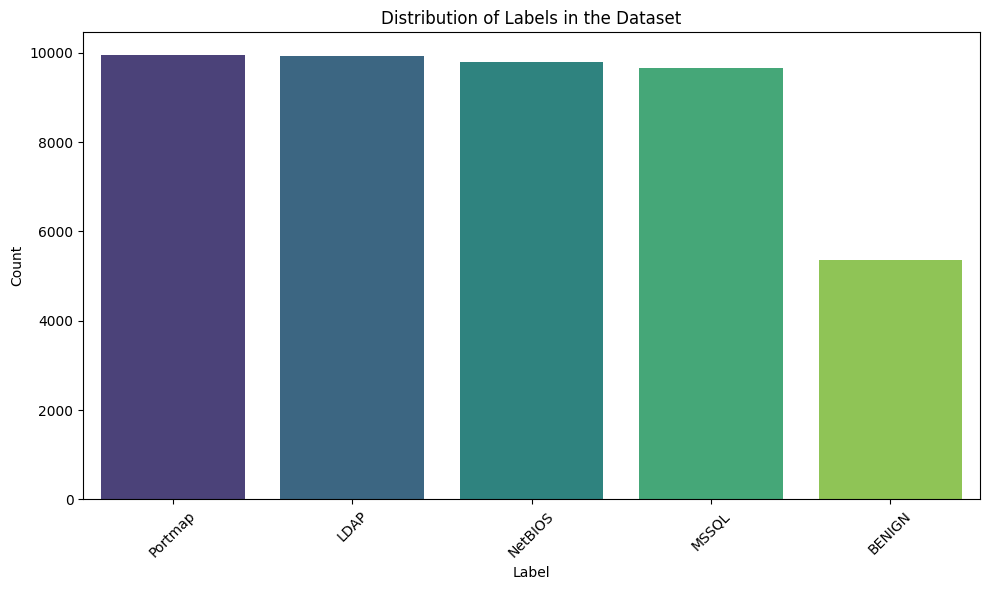

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the 'Label' column using seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x='Label', order=label_counts.index, palette="viridis")
plt.title('Distribution of Labels in the Dataset')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Compute the correlation matrix
correlation_matrix = data_cleaned.corr()

# Find pairs of columns with correlation greater than a threshold (e.g., 0.9)
highly_correlated_pairs = {}
for col in correlation_matrix.columns:
    for idx in correlation_matrix.index:
        if (0.9 < abs(correlation_matrix.loc[idx, col]) < 1.0) and (col != idx):
            sorted_pair = tuple(sorted([col, idx]))
            if sorted_pair not in highly_correlated_pairs:
                highly_correlated_pairs[sorted_pair] = correlation_matrix.loc[idx, col]

# Display pairs of columns with high correlation
highly_correlated_pairs


<ipython-input-22-1483fa675b38>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_cleaned.corr()


{('Flow Duration', 'Fwd IAT Total'): 0.9990574382353455,
 ('Bwd IAT Total', 'Flow Duration'): 0.9167676198363753,
 ('Total Backward Packets', 'Total Length of Bwd Packets'): 0.9991892868407615,
 ('Bwd Header Length', 'Total Backward Packets'): 0.9996057068926225,
 ('Subflow Bwd Bytes', 'Total Backward Packets'): 0.9991892868407615,
 ('Total Backward Packets', 'act_data_pkt_fwd'): 0.9993611891330023,
 ('Bwd Header Length', 'Total Length of Bwd Packets'): 0.998599170711635,
 ('Subflow Bwd Packets', 'Total Length of Bwd Packets'): 0.9991892868407615,
 ('Total Length of Bwd Packets', 'act_data_pkt_fwd'): 0.9986639862291748,
 ('Fwd Packet Length Max', 'Fwd Packet Length Min'): 0.955434684736817,
 ('Fwd Packet Length Max', 'Fwd Packet Length Mean'): 0.9684740904946757,
 ('Fwd Packet Length Max', 'Min Packet Length'): 0.9554218517657321,
 ('Fwd Packet Length Max', 'Max Packet Length'): 0.9514794731103284,
 ('Fwd Packet Length Max', 'Packet Length Mean'): 0.9703982820556907,
 ('Average Packet 

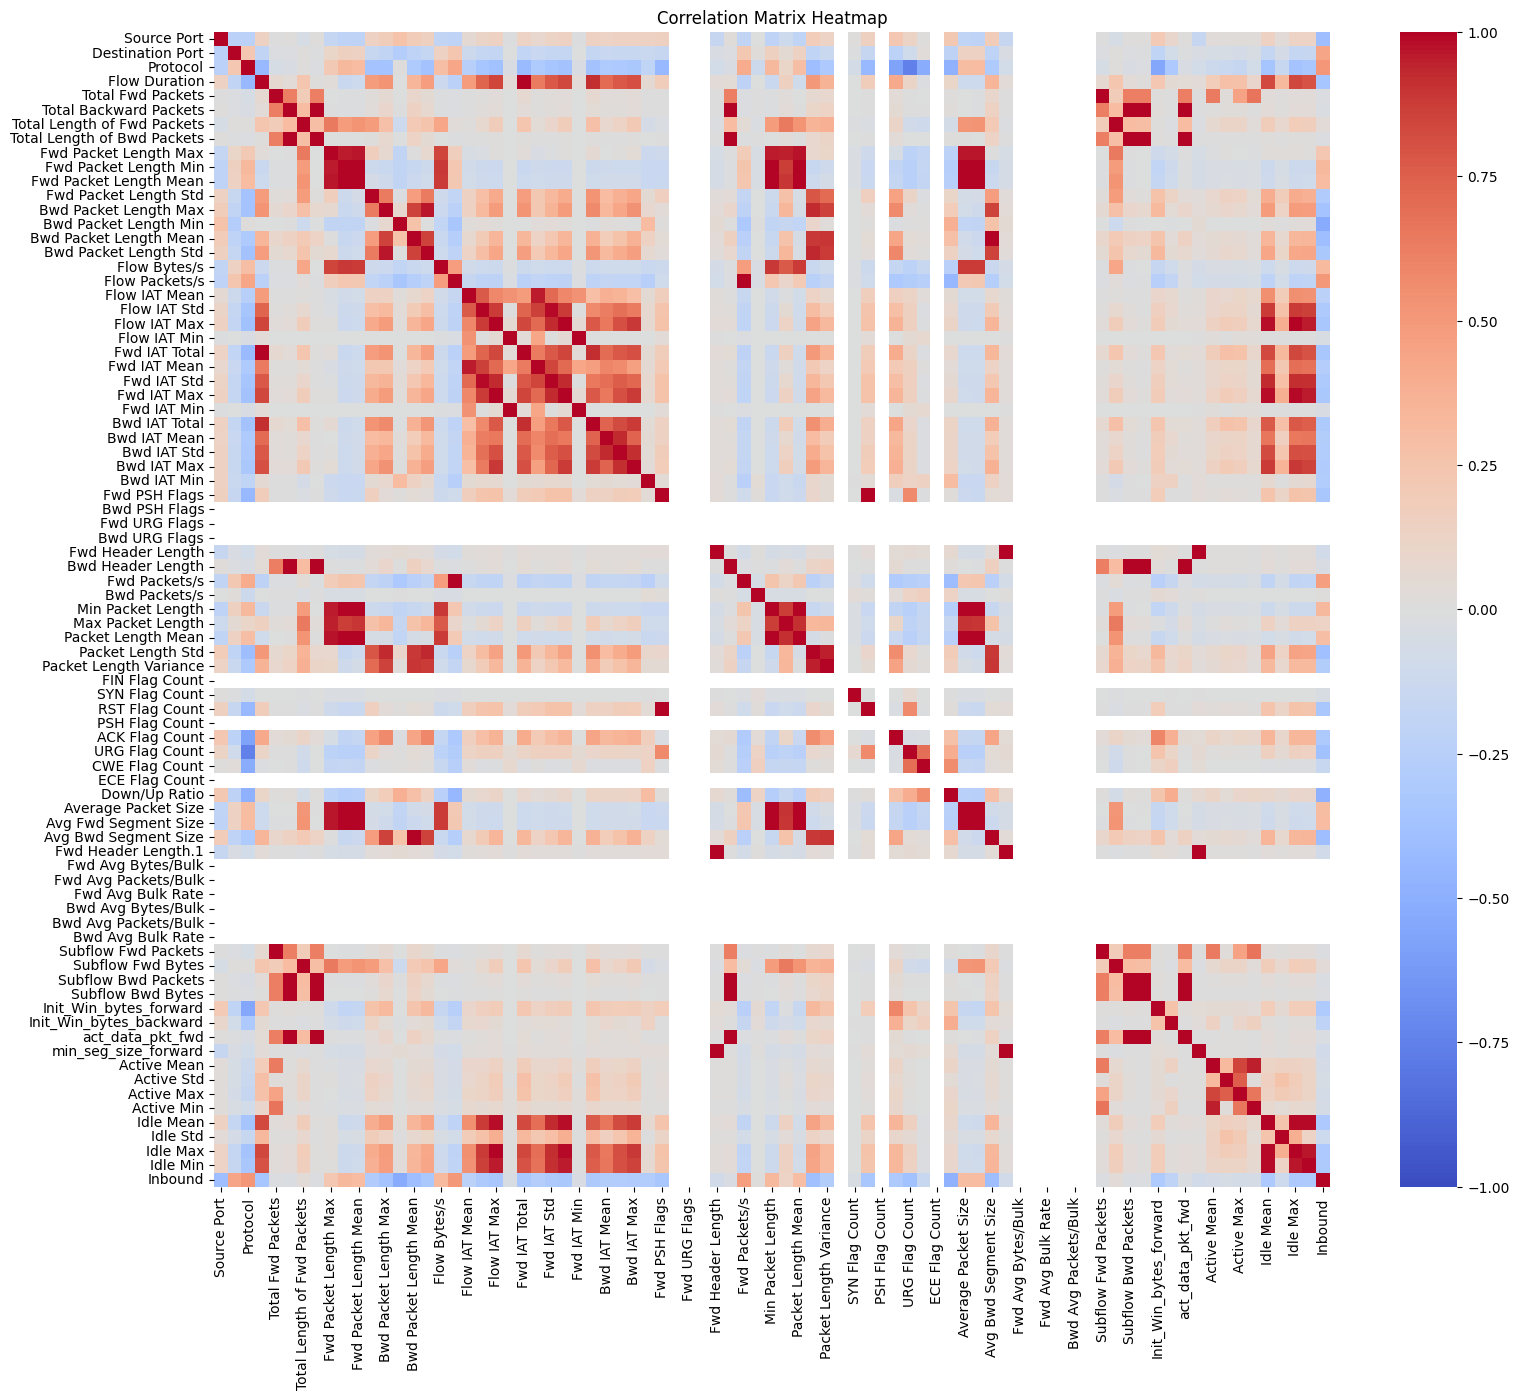

In [ ]:
# Plot the correlation matrix using seaborn's heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
# List of columns to be removed based on high correlation
columns_to_remove = []
for pair, correlation in highly_correlated_pairs.items():
    column_1, column_2 = pair
    if column_1 in columns_to_remove or column_2 in columns_to_remove:
        continue
    column_1_count = sum([1 for p in highly_correlated_pairs.keys() if column_1 in p])
    column_2_count = sum([1 for p in highly_correlated_pairs.keys() if column_2 in p])

    # Remove the column that appears more frequently in the correlation pairs
    if column_1_count > column_2_count:
        columns_to_remove.append(column_1)
    else:
        columns_to_remove.append(column_2)

# Remove the identified columns from the dataset
data_reduced = data_cleaned.drop(columns=columns_to_remove)

# Display the shape of the dataset after removing the columns
data_reduced.shape

(44687, 62)

In [ ]:
data_reduced.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Mean,...,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,Active Mean,Active Std,Active Max,Idle Std,SimillarHTTP,Inbound,Label
0,172.16.0.5-192.168.50.4-870-2908-17,172.16.0.5,870,192.168.50.4,2908,17,2018-11-03 10:09:00.565557,2,422.0,211.0,...,0,-1,-1,0.0,0.0,0.0,0.0,0,1,NetBIOS
1,172.16.0.5-192.168.50.4-871-53796-17,172.16.0.5,871,192.168.50.4,53796,17,2018-11-03 10:09:00.565559,2,530.0,265.0,...,0,-1,-1,0.0,0.0,0.0,0.0,0,1,NetBIOS
2,172.16.0.5-192.168.50.4-648-40660-17,172.16.0.5,648,192.168.50.4,40660,17,2018-11-03 10:09:00.565608,2,458.0,229.0,...,0,-1,-1,0.0,0.0,0.0,0.0,0,1,NetBIOS
3,172.16.0.5-192.168.50.4-872-54308-17,172.16.0.5,872,192.168.50.4,54308,17,2018-11-03 10:09:00.565993,2,458.0,229.0,...,0,-1,-1,0.0,0.0,0.0,0.0,0,1,NetBIOS
4,172.16.0.5-192.168.50.4-873-40653-17,172.16.0.5,873,192.168.50.4,40653,17,2018-11-03 10:09:00.565994,2,458.0,229.0,...,0,-1,-1,0.0,0.0,0.0,0.0,0,1,NetBIOS


**Data Preprocessing for Machine Learning**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the 'Label' column
data_reduced['Label_encoded'] = label_encoder.fit_transform(data_reduced['Label'])

# Display the mapping between original labels and encoded labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
label_mapping, data_reduced[['Label', 'Label_encoded']].head()

({'BENIGN': 0, 'LDAP': 1, 'MSSQL': 2, 'NetBIOS': 3, 'Portmap': 4},
      Label  Label_encoded
 0  NetBIOS              3
 1  NetBIOS              3
 2  NetBIOS              3
 3  NetBIOS              3
 4  NetBIOS              3)

In [ ]:
data_reduced.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Mean,...,Init_Win_bytes_forward,Init_Win_bytes_backward,Active Mean,Active Std,Active Max,Idle Std,SimillarHTTP,Inbound,Label,Label_encoded
0,172.16.0.5-192.168.50.4-870-2908-17,172.16.0.5,870,192.168.50.4,2908,17,2018-11-03 10:09:00.565557,2,422.0,211.0,...,-1,-1,0.0,0.0,0.0,0.0,0,1,NetBIOS,3
1,172.16.0.5-192.168.50.4-871-53796-17,172.16.0.5,871,192.168.50.4,53796,17,2018-11-03 10:09:00.565559,2,530.0,265.0,...,-1,-1,0.0,0.0,0.0,0.0,0,1,NetBIOS,3
2,172.16.0.5-192.168.50.4-648-40660-17,172.16.0.5,648,192.168.50.4,40660,17,2018-11-03 10:09:00.565608,2,458.0,229.0,...,-1,-1,0.0,0.0,0.0,0.0,0,1,NetBIOS,3
3,172.16.0.5-192.168.50.4-872-54308-17,172.16.0.5,872,192.168.50.4,54308,17,2018-11-03 10:09:00.565993,2,458.0,229.0,...,-1,-1,0.0,0.0,0.0,0.0,0,1,NetBIOS,3
4,172.16.0.5-192.168.50.4-873-40653-17,172.16.0.5,873,192.168.50.4,40653,17,2018-11-03 10:09:00.565994,2,458.0,229.0,...,-1,-1,0.0,0.0,0.0,0.0,0,1,NetBIOS,3


In [ ]:
# Identify columns with object data type without using memory-intensive operations
object_columns_direct = [col for col, dtype in zip(data_reduced.columns, data_reduced.dtypes) if dtype == 'object']
object_columns_direct

['Flow ID', 'Source IP', 'Destination IP', 'SimillarHTTP', 'Label']

In [ ]:
# Re-identify numerical columns after the dataset modifications
numerical_cols_updated = data_reduced.select_dtypes(include=['float64', 'int64']).columns
numerical_cols_updated = numerical_cols_updated.drop('Label_encoded')

# Check for infinite values in the numerical columns
infinite_values_updated = (data_reduced[numerical_cols_updated] == float('inf')).sum()

# Check for NaN values in the numerical columns
nan_values_updated = data_reduced[numerical_cols_updated].isnull().sum()

# Display columns with infinite or NaN values
columns_with_issues_updated = pd.concat([infinite_values_updated, nan_values_updated], axis=1)
columns_with_issues_updated.columns = ['Infinite_Values', 'NaN_Values']
columns_with_issues_updated[columns_with_issues_updated.sum(axis=1) > 0]

,Infinite_Values,NaN_Values
Flow Bytes/s,1323,0
Flow Packets/s,1323,0


In [ ]:
from sklearn.preprocessing import RobustScaler

# Initialize the scaler
scaler = RobustScaler()

# Remove the specified columns
data_reduced = data_reduced.drop(columns=['Flow Bytes/s', 'Flow Packets/s', 'Flow ID', 'Source IP', 'Destination IP', 'SimillarHTTP', 'Timestamp'])

# Re-identify numerical columns after removing the specified columns
numerical_cols_updated = data_reduced.select_dtypes(include=['float64', 'int64']).columns
numerical_cols_updated = numerical_cols_updated.drop('Label_encoded')


# Apply the RobustScaler to the updated numerical columns
data_reduced[numerical_cols_updated] = scaler.fit_transform(data_reduced[numerical_cols_updated])

# Display the first few rows after scaling
data_reduced.head()

,Source Port,Destination Port,Protocol,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,...,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,Active Mean,Active Std,Active Max,Idle Std,Inbound,Label,Label_encoded
0,0.000143,-0.716927,0.0,0.0,-0.05042,-0.037736,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NetBIOS,3
1,0.000161,0.645700,0.0,0.0,0.02521,0.075472,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NetBIOS,3
2,-0.003823,0.293958,0.0,0.0,-0.02521,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NetBIOS,3
3,0.000179,0.659410,0.0,0.0,-0.02521,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NetBIOS,3
4,0.000197,0.293770,0.0,0.0,-0.02521,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NetBIOS,3


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% train, 20% test)
X = data_reduced.drop(columns=['Label', 'Label_encoded'])
y = data_reduced['Label_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Display the shape of the training and testing sets
X_train.shape, X_test.shape

((35749, 54), (8938, 54))

**Machine Learning Analysis**

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

# Dictionary mapping
label_mapping = {0: 'BENIGN', 1: 'LDAP', 2: 'MSSQL', 3: 'NetBIOS', 4: 'Portmap'}

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(tree_method='gpu_hist',
    objective='multi:softmax', num_class=len(label_mapping))

# Train the classifier
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=label_mapping.values()))

Accuracy: 97.62%

Classification Report:
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00      1071
        LDAP       0.99      0.99      0.99      1986
       MSSQL       1.00      0.99      0.99      1932
     NetBIOS       0.94      0.96      0.95      1957
     Portmap       0.96      0.94      0.95      1992

    accuracy                           0.98      8938
   macro avg       0.98      0.98      0.98      8938
weighted avg       0.98      0.98      0.98      8938



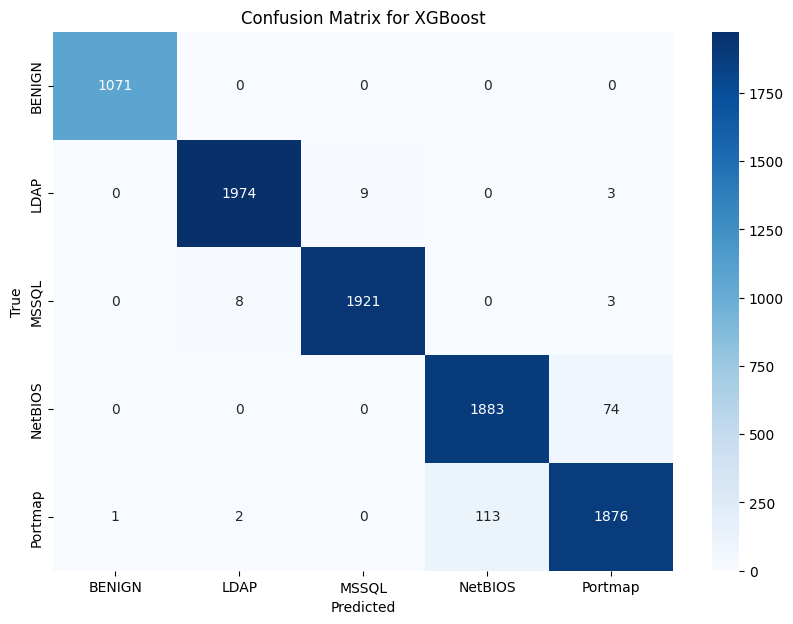

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm_xgb, annot=True, fmt='g', cmap='Blues',
            xticklabels=label_mapping.values(),
            yticklabels=label_mapping.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for XGBoost')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(n_jobs=-1, n_estimators=100, random_state=42)

# Train the classifier
rf_clf.fit(X_train, y_train)

# Predict on the test set
rf_y_pred = rf_clf.predict(X_test)


accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, rf_y_pred, target_names=label_mapping.values()))

Accuracy: 96.65%

Classification Report:
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00      1071
        LDAP       0.99      0.99      0.99      1986
       MSSQL       0.99      0.99      0.99      1932
     NetBIOS       0.92      0.95      0.93      1957
     Portmap       0.94      0.92      0.93      1992

    accuracy                           0.97      8938
   macro avg       0.97      0.97      0.97      8938
weighted avg       0.97      0.97      0.97      8938



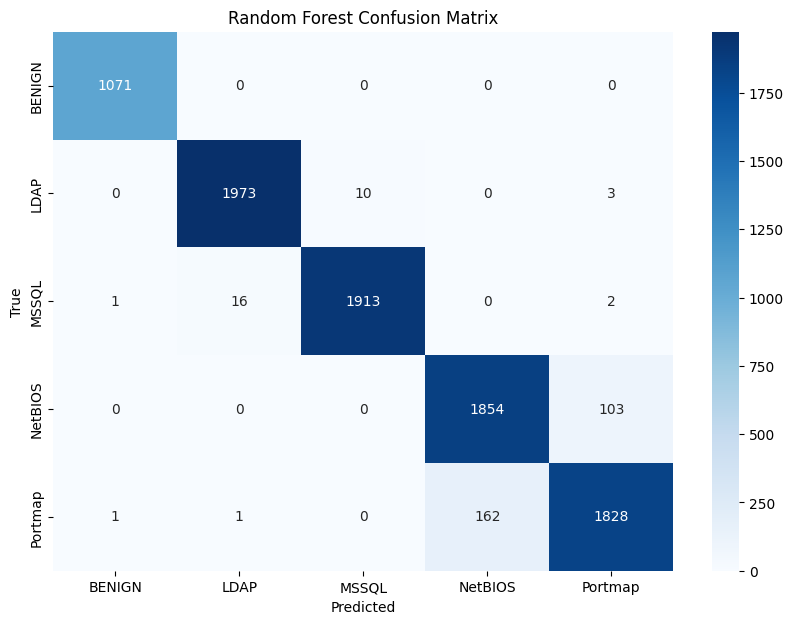

In [ ]:
# Calculate confusion matrix for Random Forest predictions
rf_cm = confusion_matrix(y_test, rf_y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(rf_cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=label_mapping.values(),
            yticklabels=label_mapping.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define XGBoost hyperparameters grid
xgb_param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 500],
    'max_depth': [3, 6, 9],
    'subsample': [0.5, 0.9],
    'colsample_bytree': [0.5, 0.9],
    'tree_method': ['gpu_hist']  # Use GPU for training
}

# Initialize GridSearchCV
xgb_search = GridSearchCV(estimator=xgb.XGBClassifier(objective='multi:softprob', num_class=len(label_mapping)),
                          param_grid=xgb_param_grid,
                          scoring='accuracy',
                          cv=3,
                          verbose=1,
                          n_jobs=-1)  # n_jobs=-1 uses all CPU cores for parallel computation

# Fit to the data
xgb_search.fit(X_train, y_train)

# Print the best parameters
print("Best XGBoost Parameters: ", xgb_search.best_params_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best XGBoost Parameters:  {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.9, 'tree_method': 'gpu_hist'}


In [ ]:
# Initialize the best XGBoost model with the parameters you obtained
best_xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=len(label_mapping),
    colsample_bytree=0.5,
    learning_rate=0.1,
    max_depth=6,
    n_estimators=100,
    subsample=0.9,
    tree_method='gpu_hist',
    random_state=42
)

# Fit the model to the training data
best_xgb_model.fit(X_train, y_train)


# Predict on the test set
best_xgb_pred = best_xgb_model.predict(X_test)

bxgb_accuracy = accuracy_score(y_test, best_xgb_pred)
print(f"Accuracy: {bxgb_accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, best_xgb_pred, target_names=label_mapping.values()))

Accuracy: 97.71%

Classification Report:
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00      1071
        LDAP       1.00      0.99      0.99      1986
       MSSQL       1.00      0.99      1.00      1932
     NetBIOS       0.94      0.97      0.95      1957
     Portmap       0.97      0.94      0.95      1992

    accuracy                           0.98      8938
   macro avg       0.98      0.98      0.98      8938
weighted avg       0.98      0.98      0.98      8938



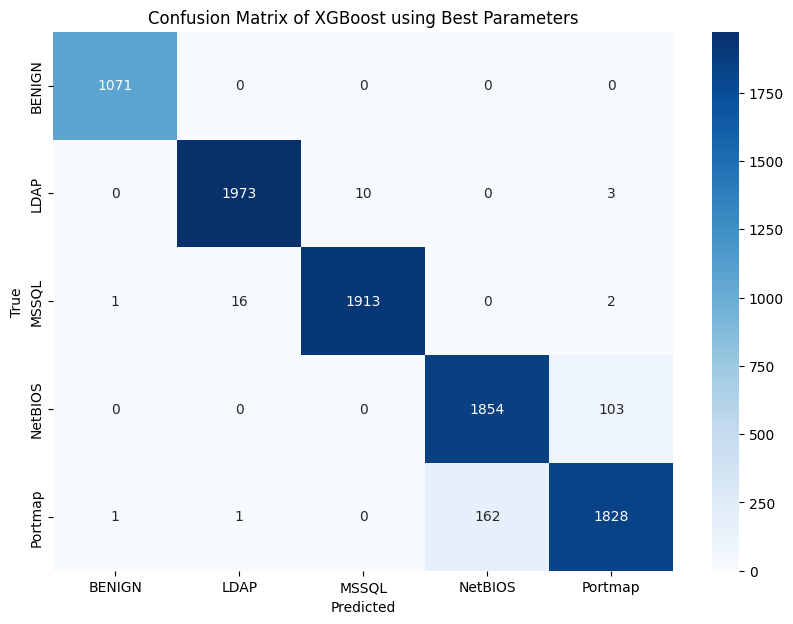

In [ ]:
# Calculate confusion matrix for Random Forest predictions
bxgb_cm = confusion_matrix(y_test, rf_y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(bxgb_cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=label_mapping.values(),
            yticklabels=label_mapping.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of XGBoost using Best Parameters')
plt.show()

In [ ]:
# Define Random Forest hyperparameters grid
rf_param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
rf_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                         param_grid=rf_param_grid,
                         scoring='accuracy',
                         cv=3,
                         verbose=1,
                         n_jobs=-1)

# Fit to the data
rf_search.fit(X_train, y_train)

# Print the best parameters
print("Best Random Forest Parameters: ", rf_search.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Random Forest Parameters:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


In [ ]:
best_rf = RandomForestClassifier(
    max_depth=20,
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=300,
    random_state=42
)

# Train the classifier
best_rf.fit(X_train, y_train)

# Predict on the test set
best_rf_y_pred = best_rf.predict(X_test)


accuracy = accuracy_score(y_test, best_rf_y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, best_rf_y_pred, target_names=label_mapping.values()))

Accuracy: 97.64%

Classification Report:
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00      1071
        LDAP       0.99      0.99      0.99      1986
       MSSQL       1.00      0.99      0.99      1932
     NetBIOS       0.95      0.96      0.96      1957
     Portmap       0.96      0.94      0.95      1992

    accuracy                           0.98      8938
   macro avg       0.98      0.98      0.98      8938
weighted avg       0.98      0.98      0.98      8938



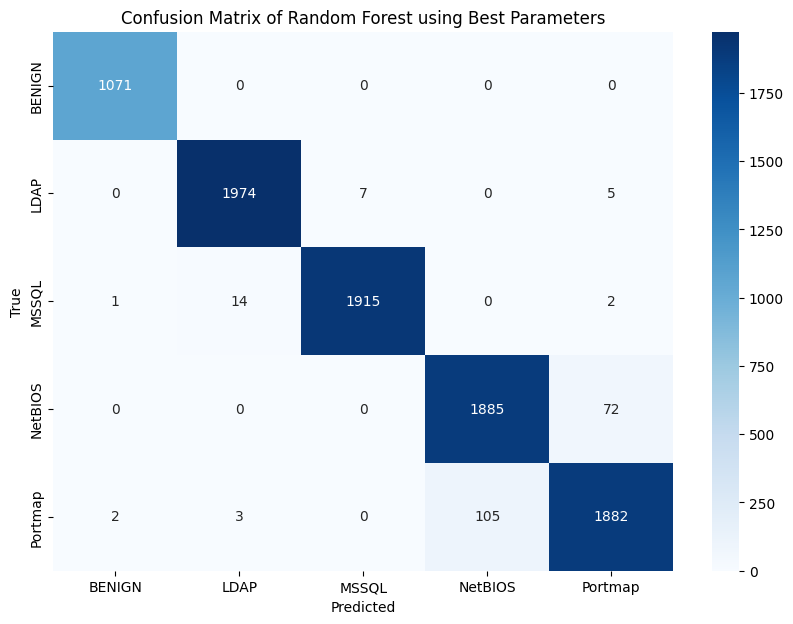

In [ ]:
# Calculate confusion matrix for Random Forest predictions
brf_cm = confusion_matrix(y_test, best_rf_y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(brf_cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=label_mapping.values(),
            yticklabels=label_mapping.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Random Forest using Best Parameters')
plt.show()